<a href="https://colab.research.google.com/github/AdelGitGud/Notebook-testing-ground/blob/master/ECORP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECORP 1

---


## Get the data and setup project

### Base setup

In [34]:
!pip install ipython-sql

In [35]:
from pathlib import Path
import urllib.request
import pandas as pd

In [36]:
Path("datasets").mkdir(parents=True, exist_ok=True)

### Download the data

In [37]:
def DownloadData(dataset):
  filePath = Path("datasets/" + dataset)
  if not filePath.is_file():
    url = "https://gitlab.com/AdelElHassani/ecorp-1/-/raw/main/" + dataset
    urllib.request.urlretrieve(url, filePath)
  return filePath

def ReadSqlScript(script):
  with open(script, 'r') as f:
    return f.read()


productsXl = pd.read_excel(DownloadData("products.xlsx"))
productsDateJson = pd.read_json(DownloadData("products_date.json"))
employeesCsv = pd.read_csv(DownloadData("employees.csv"))
departmentQuery = ReadSqlScript(DownloadData("department.sql"))

## Explore the data

### Data info and observations

products.xlsx

---

In [38]:
productsXl.info()
productsXl.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1000 non-null   object 
 1   price        1000 non-null   float64
 2   available    1000 non-null   bool   
 3   description  710 non-null    object 
dtypes: bool(1), float64(1), object(2)
memory usage: 24.5+ KB


,name,price,available,description
0,Wine - Ej Gallo Sierra Valley,11.49,False,NaN
1,Graham Cracker Mix,27.66,False,NaN
2,Nantucket - 518ml,27.50,False,NaN
3,"Pepper - Julienne, Frozen",22.88,True,Ameliorated demand-driven algorithm
4,"Soup - Campbells, Spinach Crm",24.23,True,Robust bottom-line pricing structure


In [39]:
productsXl.describe()

,price
count,1000.000000
mean,20.359010
std,5.699566
min,10.020000
25%,15.682500
50%,20.745000
75%,25.172500
max,29.990000


<Axes: >

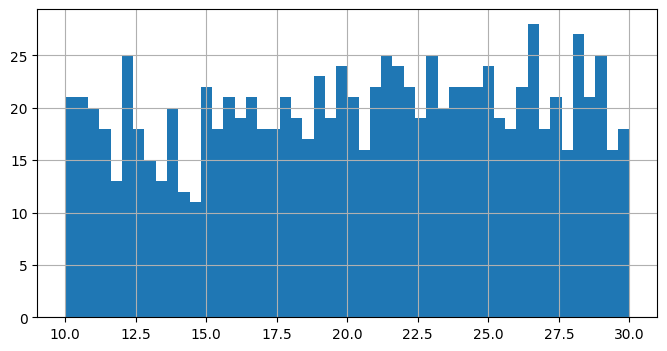

In [51]:
productsXl["price"].hist(bins=50, figsize=(8, 4))

Obserbations:
*   Null descriptions



products_date.json

---

In [41]:
productsDateJson.info()
productsDateJson.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  1000 non-null   int64 
 1   max_date    1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,product_id,max_date
0,1,2024-11-12
1,2,2024-01-17
2,3,2023-10-24
3,4,2024-09-27
4,5,2024-11-24


employees.csv

---

In [42]:
employeesCsv.info()
employeesCsv.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          200 non-null    int64  
 1   first_name  200 non-null    object 
 2   last_name   200 non-null    object 
 3   email       200 non-null    object 
 4   job         187 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB


,id,first_name,last_name,email,job
0,1,Wallache,Argue,wargue0@mashable.com,5.0
1,2,Janos,Morrilly,jmorrilly1@ask.com,7.0
2,3,Joete,Remirez,jremirez2@linkedin.com,12.0
3,4,Holly,Weatherhead,hweatherhead3@house.gov,8.0
4,5,Bee,Swyndley,bswyndley4@merriam-webster.com,4.0


In [46]:
employeesCsv["job"].value_counts()

5.0     14
16.0    12
14.0    12
12.0    11
8.0     11
3.0     11
4.0     10
17.0    10
15.0    10
9.0      9
11.0     9
18.0     9
10.0     9
20.0     9
2.0      8
19.0     8
13.0     8
7.0      7
1.0      6
6.0      4
Name: job, dtype: int64

<Axes: >

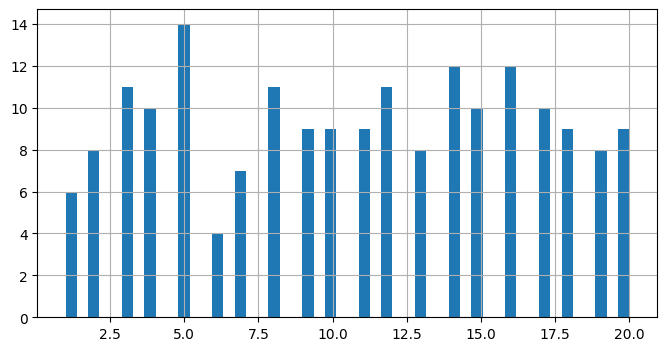

In [49]:
employeesCsv["job"].hist(bins=50, figsize=(8, 4))

Obserbations:
*   Null jobs
*   float job category




departments.sql

---

In [44]:
print(departmentQuery)

create table department (
	dept_name VARCHAR(50),
	dept_num INT
);
insert into department (dept_name, dept_num) values ('Services', 1);
insert into department (dept_name, dept_num) values ('Engineering', 2);
insert into department (dept_name, dept_num) values ('Product Management', 3);
insert into department (dept_name, dept_num) values ('Sales', 4);
insert into department (dept_name, dept_num) values ('Training', 5);
insert into department (dept_name, dept_num) values ('Human Resources', 6);
insert into department (dept_name, dept_num) values ('Product Management', 7);
insert into department (dept_name, dept_num) values ('Legal', 8);
insert into department (dept_name, dept_num) values ('Marketing', 9);
insert into department (dept_name, dept_num) values ('Support', 10);
insert into department (dept_name, dept_num) values ('Support', 11);
insert into department (dept_name, dept_num) values ('Legal', 12);
insert into department (dept_name, dept_num) values ('Training', 13);
insert into 

Obserbations:
- Duplicate entries

## Prepare the data for database

Products

---

In [45]:
finalProducts = pd.concat([productsDateJson, productsXl], axis=1)
finalProducts.head()

,product_id,max_date,name,price,available,description
0,1,2024-11-12,Wine - Ej Gallo Sierra Valley,11.49,False,NaN
1,2,2024-01-17,Graham Cracker Mix,27.66,False,NaN
2,3,2023-10-24,Nantucket - 518ml,27.50,False,NaN
3,4,2024-09-27,"Pepper - Julienne, Frozen",22.88,True,Ameliorated demand-driven algorithm
4,5,2024-11-24,"Soup - Campbells, Spinach Crm",24.23,True,Robust bottom-line pricing structure


Departments

---

Employees

---

## Insert model into database